In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['tim', 'burton', 'cinema', 'storm', 'action', 'batman', 'wood', 'films', 'hollow', 'features', 'script', 'mess', 'adventures', 'crane', 'disney', 'burton', 'film', 'frights', 'stories', 'story', 'dialogue', 'crane', 'johnny', 'depp', 'york', 'investigate', 'murders', 'victims', 'traces', 'evidence', 'murderer', 'horseman', 'help', 'ricci', 'headless', 'horseman', 'spree', 'town', 'sleepy', 'headless', 'horseman', 'character', 'story', 'holes', 'disaster', 'horseman', 'end', 'film', 'audiences', 'atmosphere', 'characters', 'heroes', 'risk', 'element', 'film', 'script', 'time', 'look', 'kind', 'mess', 'headless', 'horseman', 'victims', 'story', 'pieces', 'factors', 'depp', 'character', 'cartoon', 'manner', 'liners', 'doubt', 'frankly', 'sleepy', 'christina', 'ricci', 'actress', 'actor', 'blockbuster', 'script', 'sets', 'eerie', 'fog', 'attention', 'films', 'eye', 'candy', 'scenes', 'value', 'heads', 'fight', 'horseman', 'depp', 'casper', 'van', 'wish', 'gaping', 'film', 'scenery', 'end'

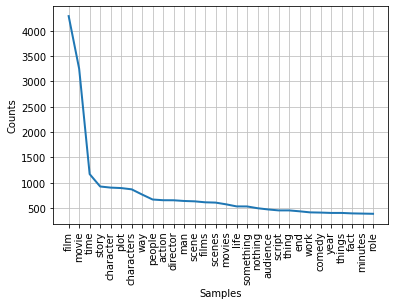

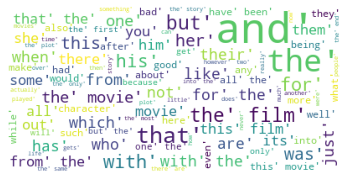

  (1, 6385)	1
  (2, 9070)	1
  (3, 1206)	1
  (5, 8826)	1
  (6, 1544)	1
  (7, 8516)	1
  (10, 141)	1
  (11, 6306)	1
  (12, 756)	1
  (15, 4182)	1
  (16, 9883)	1
  (18, 5043)	1
  (20, 3332)	1
  (23, 2111)	1
  (24, 8157)	1
  (25, 4219)	1
  (28, 9402)	1
  (29, 3255)	1
  (32, 7782)	1
  (33, 8944)	1
  (34, 5643)	1
  (38, 7317)	1
  (39, 2537)	1
  (40, 3206)	1
  (41, 204)	1
  :	:
  (492732, 5528)	1
  (492733, 9890)	1
  (492737, 8519)	1
  (492738, 3478)	1
  (492739, 1950)	1
  (492742, 9937)	1
  (492743, 5796)	1
  (492744, 6363)	1
  (492746, 5389)	1
  (492747, 3703)	1
  (492748, 9876)	1
  (492750, 1687)	1
  (492751, 3865)	1
  (492752, 7782)	1
  (492754, 1425)	1
  (492756, 608)	1
  (492757, 1950)	1
  (492758, 7565)	1
  (492760, 3050)	1
  (492761, 5697)	1
  (492762, 6102)	1
  (492763, 8900)	1
  (492765, 2451)	1
  (492767, 8417)	1
  (492771, 285)	1
['past', 'tim', 'burton', 'taken', 'cinema', 'storm', 'action', 'packed', 'batman', 'hilarious']
Most frequent descriptive phrases for Testing.txt
[('film'

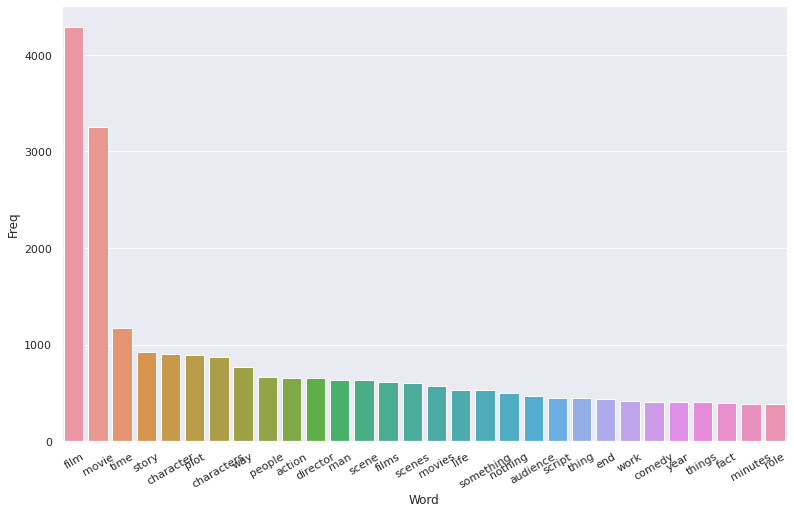

In [2]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import tokenize
from operator import itemgetter
import math
from os import path
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
#% matplotlib inline
import re
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import pandas as pd
'''
text_path = input('Enter file name: ')
text = open(text_path).read()
'''
#text = open('C:\\Users\\z3696\\Documents\\CS611-FP-JD\\COVIDFULL\\immune.txt').read()
#text = open('C:\\Users\\z3696\\Documents\\CS611-FP-JD\\COVIDFULL\\problems_in_china.txt').read()
#text = open('C:\\Users\\z3696\\Documents\\CS611-FP-JD\\COVIDFULL\\risk_factors.txt').read()
text = open('/content/drive/MyDrive/FINAL PROJECT/POLORITY/all_text/neg.txt').read()
#text = open('C:\\Users\\z3696\\Documents\\CS611-FP-JD\\COVIDFULL\\transmission.txt').read()
'''
'''
print(text)
lines = text #read all lines
#sentences = nltk.sent_tokenize(lines) #tokenize sentences
#nouns = [] #empty to array to hold all nouns


# do the nlp processing
#tokenized = nltk.word_tokenize(lines)
tokenized_text=sent_tokenize(lines)
tokenized=word_tokenize(lines)
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown", "https",
             "version", "peer", "funder", "review", "holder", "doi", "license", "copyright", "preprint", "et", "al", "www"]
stop_words = stop_words.union(new_words)
lines = text.lower()
lines = re.sub('[^A-Za-z0-9]+', ' ', lines)  #Remove punctuations
#Convert to lowercase
#lines = re.sub("(\\d|\\W)+"," ",text) #remove special characters and digits
lines = re.sub('\W+',' ', lines) # Remove special characters
lines = re.sub('https?://(www.)?\w+\.\w+(/\w+)*/?', ' ', lines) # remove hyperlinks
lines = re.sub('@(\w+)', ' ', lines) # remove mentions
alpha_num_re = re.compile("^[a-z0-9_.]+$")
list_pos = 0
cleaned_str = ''
for word in lines.split():
    if list_pos == 0:
        if alpha_num_re.match(word) and len(word) > 2:
            cleaned_str = word
        else:
            cleaned_str = ' '
    else:
        if alpha_num_re.match(word) and len(word) > 2:
            cleaned_str = cleaned_str + ' ' + word
        else:
            cleaned_str += ' '
    list_pos += 1
lines = cleaned_str.split() ##Convert to list from string
#ps=PorterStemmer() ##Stemming
#lem = WordNetLemmatizer() #Lemmatisation
#is_noun = lambda pos: pos[:2] == 'NN'
#lines = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos) if not word in stop_words]
#lines = [token for token, pos in nltk.pos_tag(word_tokenize(lines)) if pos.startswith('N')]
#lines = [lem.lemmatize(word) for word in text if not word in  stop_words]
#lines =" ".join(lines)
#corpus.append(lines)
print(lines)
is_noun = lambda pos: pos[:2] == 'NN'
nouns = [word for (word, pos) in nltk.pos_tag(lines) if is_noun(pos) if not word in stop_words]
print(nouns)
fdist = FreqDist(nouns)
print(fdist)
print(fdist.most_common(30))
fdist.plot(30,cumulative=False)
plt.show()


#Word cloud

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50,
                          random_state=42
                         ).generate(str(lines))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(lines)
print(X)

cvlist =list(cv.vocabulary_.keys())[:10]
print(cvlist)

#Most frequently occuring words
def get_top_n_words(lines, n=None):
    vec = CountVectorizer().fit(lines)
    #print(vec)
    bag_of_words = vec.transform(lines)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0)
    #print(sum_words)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                   vec.vocabulary_.items()]
    #print(words_freq)
    words_freq =sorted(words_freq, key = lambda x: x[1],
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(nouns, n=30)
print("Most frequent descriptive phrases for Testing.txt")
print(top_words)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['works', 'complexity', 'status', 'reviewer', 'anything', 'masterpieces', 'casablanca', 'film', 'history', 'art', 'popularity', 'remakes', 'century', 'premiere', 'tributes', 'references', 'movie', 'makers', 'works', 'day', 'movie', 'virtue', 'critics', 'audience', 'things', 'film', 'fact', 'movie', 'making', 'time', 'mediocre', 'stage', 'screenplay', 'writers', 'philip', 'epstein', 'howard', 'koch', 'actors', 'producers', 'choice', 'man', 'camera', 'michael', 'curtiz', 'director', 'movie', 'oscars', 'film', 'day', 'example', 'hollywood', 'film', 'age', 'plot', 'movie', 'needs', 'propaganda', 'circumstances', 'conflict', 'order', 'story', 'december', 'casablanca', 'port', 'coast', 'north', 'africa', 'government', 'thousands', 'refugees', 'war', 'europe', 'way', 'lisbon', 'safety', 'america', 'pay', 'price', 'exit', 'characters', 'misery', 'police', 'chief', 'captain', 'renault', 'friend', 'rick', 'bogart', 'fascist', 'night', 'club', 'casablanca', 'philosophy', 'neck', 'nobody', 'everyt

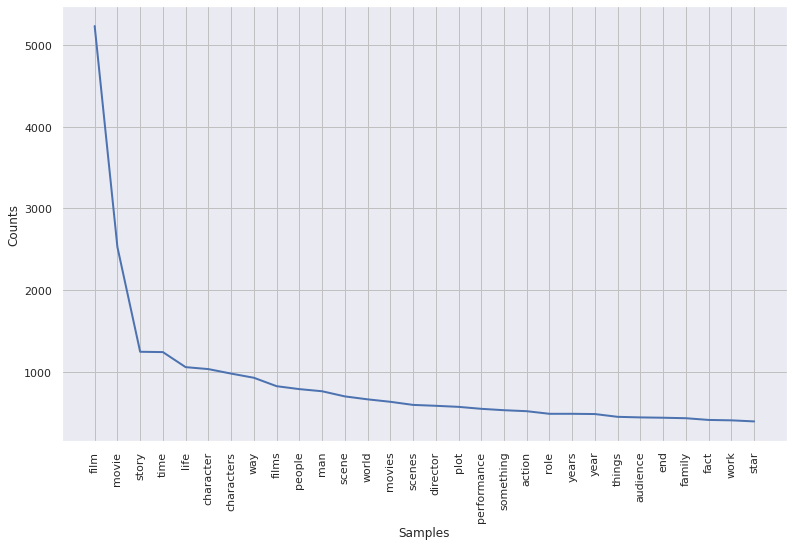

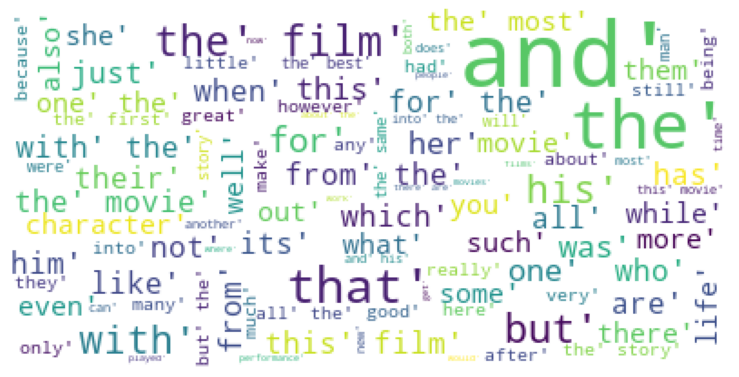

  (3, 9914)	1
  (4, 530)	1
  (7, 320)	1
  (8, 4513)	1
  (14, 1770)	1
  (18, 5163)	1
  (19, 8470)	1
  (21, 6851)	1
  (23, 7442)	1
  (24, 7731)	1
  (25, 439)	1
  (26, 6262)	1
  (30, 1337)	1
  (31, 6884)	1
  (34, 870)	1
  (35, 3364)	1
  (37, 4264)	1
  (39, 7932)	1
  (40, 530)	1
  (42, 2277)	1
  (45, 6719)	1
  (48, 6720)	1
  (52, 5887)	1
  (54, 5187)	1
  (55, 2524)	1
  :	:
  (553164, 3506)	1
  (553167, 180)	1
  (553169, 9961)	1
  (553170, 3658)	1
  (553171, 1704)	1
  (553172, 2041)	1
  (553173, 9881)	1
  (553175, 7747)	1
  (553176, 3364)	1
  (553178, 4784)	1
  (553179, 1133)	1
  (553181, 1133)	1
  (553182, 3774)	1
  (553183, 668)	1
  (553184, 9928)	1
  (553185, 6511)	1
  (553188, 2962)	1
  (553189, 1345)	1
  (553190, 9849)	1
  (553191, 3039)	1
  (553192, 554)	1
  (553194, 9278)	1
  (553195, 2289)	1
  (553196, 8175)	1
  (553198, 5221)	1
['works', 'art', 'almost', 'impossible', 'complexity', 'legendary', 'status', 'prevents', 'reviewer', 'say']
Most frequent descriptive phrases for Testing.t

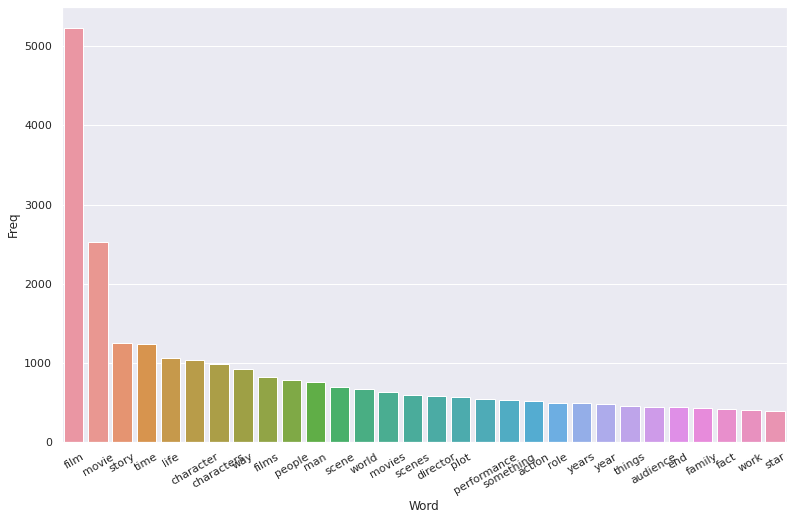

In [3]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import tokenize
from operator import itemgetter
import math
from os import path
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
#% matplotlib inline
import re
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import pandas as pd
'''
text_path = input('Enter file name: ')
text = open(text_path).read()
'''
#text = open('C:\\Users\\z3696\\Documents\\CS611-FP-JD\\COVIDFULL\\immune.txt').read()
#text = open('C:\\Users\\z3696\\Documents\\CS611-FP-JD\\COVIDFULL\\problems_in_china.txt').read()
#text = open('C:\\Users\\z3696\\Documents\\CS611-FP-JD\\COVIDFULL\\risk_factors.txt').read()
text = open('/content/drive/MyDrive/FINAL PROJECT/POLORITY/all_text/pos.txt').read()
#text = open('C:\\Users\\z3696\\Documents\\CS611-FP-JD\\COVIDFULL\\transmission.txt').read()
'''
'''
print(text)
lines = text #read all lines
#sentences = nltk.sent_tokenize(lines) #tokenize sentences
#nouns = [] #empty to array to hold all nouns


# do the nlp processing
#tokenized = nltk.word_tokenize(lines)
tokenized_text=sent_tokenize(lines)
tokenized=word_tokenize(lines)
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown", "https",
             "version", "peer", "funder", "review", "holder", "doi", "license", "copyright", "preprint", "et", "al", "www"]
stop_words = stop_words.union(new_words)
lines = text.lower()
lines = re.sub('[^A-Za-z0-9]+', ' ', lines)  #Remove punctuations
#Convert to lowercase
#lines = re.sub("(\\d|\\W)+"," ",text) #remove special characters and digits
lines = re.sub('\W+',' ', lines) # Remove special characters
lines = re.sub('https?://(www.)?\w+\.\w+(/\w+)*/?', ' ', lines) # remove hyperlinks
lines = re.sub('@(\w+)', ' ', lines) # remove mentions
alpha_num_re = re.compile("^[a-z0-9_.]+$")
list_pos = 0
cleaned_str = ''
for word in lines.split():
    if list_pos == 0:
        if alpha_num_re.match(word) and len(word) > 2:
            cleaned_str = word
        else:
            cleaned_str = ' '
    else:
        if alpha_num_re.match(word) and len(word) > 2:
            cleaned_str = cleaned_str + ' ' + word
        else:
            cleaned_str += ' '
    list_pos += 1
lines = cleaned_str.split() ##Convert to list from string
#ps=PorterStemmer() ##Stemming
#lem = WordNetLemmatizer() #Lemmatisation
#is_noun = lambda pos: pos[:2] == 'NN'
#lines = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos) if not word in stop_words]
#lines = [token for token, pos in nltk.pos_tag(word_tokenize(lines)) if pos.startswith('N')]
#lines = [lem.lemmatize(word) for word in text if not word in  stop_words]
#lines =" ".join(lines)
#corpus.append(lines)
print(lines)
is_noun = lambda pos: pos[:2] == 'NN'
nouns = [word for (word, pos) in nltk.pos_tag(lines) if is_noun(pos) if not word in stop_words]
print(nouns)
fdist = FreqDist(nouns)
print(fdist)
print(fdist.most_common(30))
fdist.plot(30,cumulative=False)
plt.show()


#Word cloud

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50,
                          random_state=42
                         ).generate(str(lines))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(lines)
print(X)

cvlist =list(cv.vocabulary_.keys())[:10]
print(cvlist)

#Most frequently occuring words
def get_top_n_words(lines, n=None):
    vec = CountVectorizer().fit(lines)
    #print(vec)
    bag_of_words = vec.transform(lines)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0)
    #print(sum_words)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                   vec.vocabulary_.items()]
    #print(words_freq)
    words_freq =sorted(words_freq, key = lambda x: x[1],
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(nouns, n=30)
print("Most frequent descriptive phrases for Testing.txt")
print(top_words)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()